In [169]:
import numpy as np
import random 
import math
import matplotlib.pyplot as plt

In [170]:
#функция circle по количеству точек k выдает трехмерный массив координат случайных точек на окружности
def circle (k):
    points = np.zeros((3,k))
    for i in range (k):
        points[0][i]=random.random()*2*math.pi
        points[1][i]=math.cos(points[0][i])
        points[2][i]=math.sin(points[0][i])
    return points

In [171]:
#рисует немасштабируемый двумерный график по x и y 
def graph2 (m):
    graph1 = plt.scatter(m[0],m[1])
    plt.axis('equal')
    plt.show()

In [172]:
#по двум массивам из координат точек создает матрицу 2d евклидовых расстояний между ними
def dist_eucl2 (m):
    k=len(m[0])
    d= np.zeros((k,k))
    for i in range (k):
        for j in range (k):
            d[i][j]=math.sqrt((m[1][i]-m[1][j])**2 + (m[0][i]-m[0][j])**2 )      
    return d

In [173]:
#по двум массивам из координат точек создает матрицу 3d евклидовых расстояний между ними
def dist_eucl3 (m):
    k=len(m[0])
    d= np.zeros((k,k))
    for i in range (k):
        for j in range (k):
            d[i][j]=math.sqrt((m[1][i]-m[1][j])**2 + (m[0][i]-m[0][j])**2 + (m[2][i]-m[2][j])**2 )      
    return d

In [174]:
#матрица растояний по метрике окружности 
def dist_circle (r):
    k=len(r)
    d= np.zeros((k,k))
    for i in range (k):
        for j in range (k):
            d[i][j]=math.fabs(r[j]-r[i])
    return d

In [175]:
#заводим метод mds из библиотеки sklearn, с возможностью выбора размерности p
def sk_mds (d,p):
    from sklearn import manifold
    mds = manifold.MDS(p, max_iter=100, n_init=1, dissimilarity='precomputed')
    trans_data = mds.fit_transform(d).T
    return trans_data

In [176]:
#свой метод mds (https://arxiv.org/pdf/1806.00416.pdf )
def my_mds (d,p):
    k=len(d[0])
    H = np.eye(k) - np.ones((k, k))/k
    B = H.T.dot(d**2).dot(H)/(-2)
                                            
    evals, evecs = np.linalg.eigh(B)
    
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
    
    w, = np.where(evals > 0)
    l=min(len(w),p)
    w=w[:l]

    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
    return [Y.T,V.T]

In [177]:
#рисование 3d графика для последовательности seq
def graph3 (m,seq):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(m[seq[0]],m[seq[1]],m[seq[2]])
    plt.show()
    

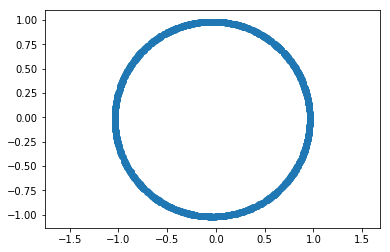

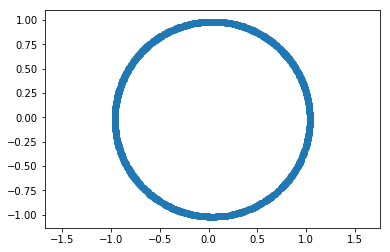

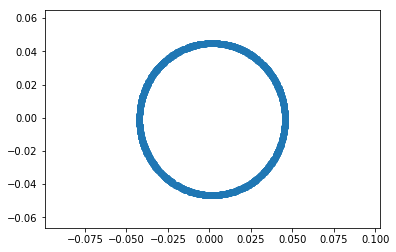

In [178]:
k=1000
pnts=circle(k)
d2e=dist_eucl2([pnts[1],pnts[2]])
d2c=dist_circle(pnts[0])
graph2(sk_mds(d2e,2))
graph2(my_mds(d2e,2)[0])
graph2(my_mds(d2e,2)[1])
#рисование многообразия по евклидовой метрике

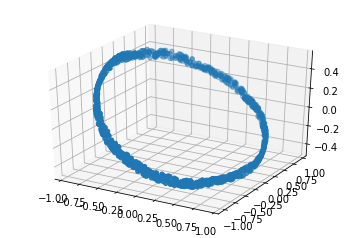

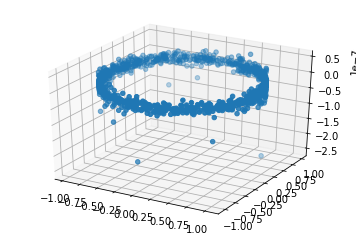

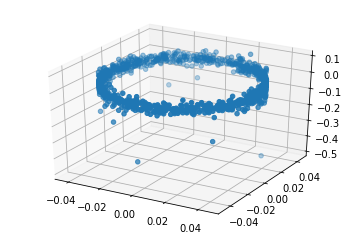

In [179]:
graph3(sk_mds(d2e,3),[0,1,2])
graph3(my_mds(d2e,3)[0],[0,1,2])
graph3(my_mds(d2e,3)[1],[0,1,2])
#рисование многообразия евкл.окружности в 3d

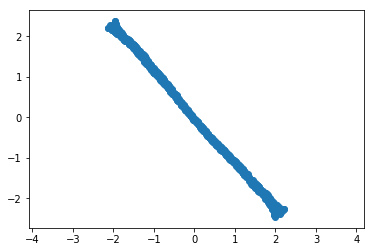

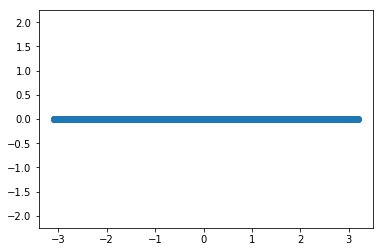

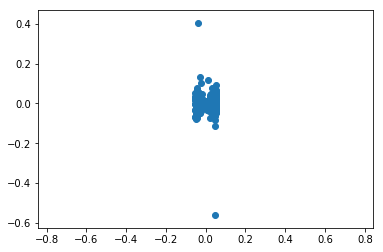

In [180]:
graph2(sk_mds(d2c,2))
graph2(my_mds(d2c,2)[0])
graph2(my_mds(d2c,2)[1])
#рисование многообразия по метрике окружности

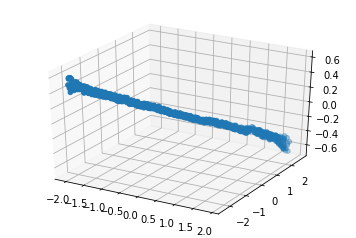

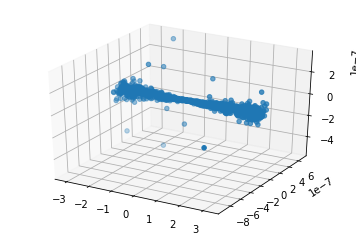

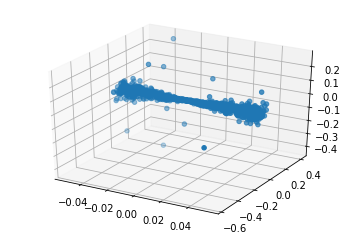

In [181]:
graph3(sk_mds(d2c,3),[0,1,2])
graph3(my_mds(d2c,3)[0],[0,1,2])
graph3(my_mds(d2c,3)[1],[0,1,2])
#рисование многообразия евкл.окружности в 3d

In [182]:
#функция sphere по количеству точек k выдает два массива координат случайных точек на сфере, сферические и днкартовы координаты
def sphere (k):
    sph = np.zeros((2,k))
    dec = np.zeros((3,k))
    for i in range (k):
        sph[0][i]=random.random()*2*math.pi #широта
        sph[1][i]=random.random()*math.pi #долгота
        dec[0][i]=np.sin(sph[1][i]) * np.cos(sph[0][i])
        dec[1][i]=np.sin(sph[1][i]) * np.sin(sph[0][i])
        dec[2][i]=np.cos(sph[1][i])
    return sph,dec

In [183]:
 # haversine formula 
def dist_sph (m):
    from math import  cos, sin, atan2, sqrt
    k=len(m[0])
    d= np.zeros((k,k))
    for i in range(k):
        for j in range (k):
            f2,f1,l2,l1=m[0][j],m[0][i],m[1][j],m[1][i]
            dl=f2-f1
            df=l2-l1
            a=sqrt( (cos(f2)*sin(dl))**2 + ( cos(f1)*sin(f2) - sin(f1)*cos(f2)*cos(dl))**2 )
            b=sin(f1)*sin(f2)+cos(f1)*cos(f2)*cos(dl)
            d[i][j] = atan2( a,b)
    return d

In [184]:
k=1000
sph,dec=sphere(k)
d3e=dist_eucl3(dec)
d3c=dist_sph(sph)

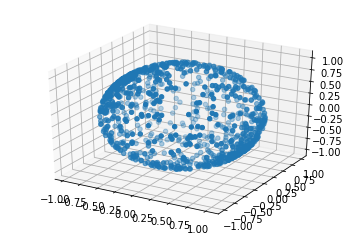

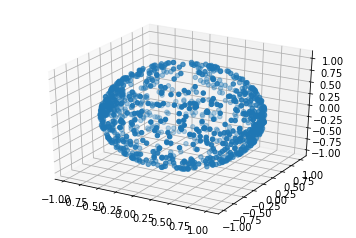

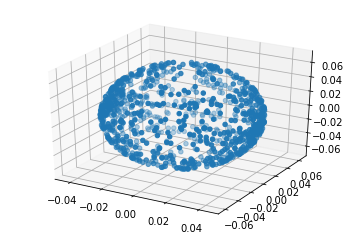

In [185]:
graph3(sk_mds(d3e,3),[0,1,2])
graph3(my_mds(d3e,3)[0],[0,1,2])
graph3(my_mds(d3e,3)[1],[0,1,2])
#рисование многообразия евкл.сферы в 3d

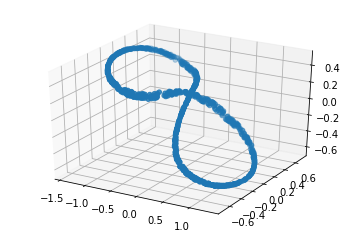

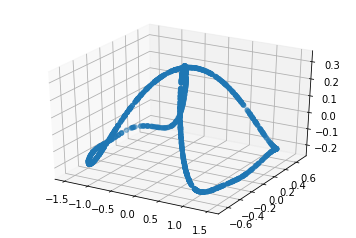

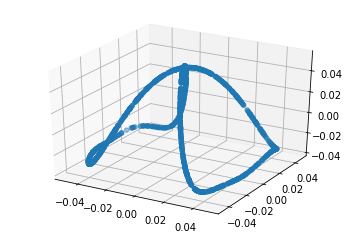

In [186]:
graph3(sk_mds(d3c,3),[0,1,2])
graph3(my_mds(d3c,3)[0],[0,1,2])
graph3(my_mds(d3c,3)[1],[0,1,2])
#рисование многообразия сферы со своей метрикой в 3d

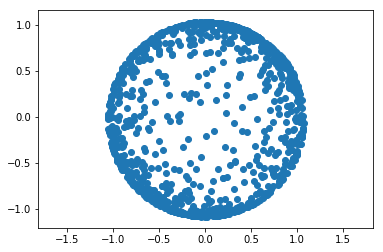

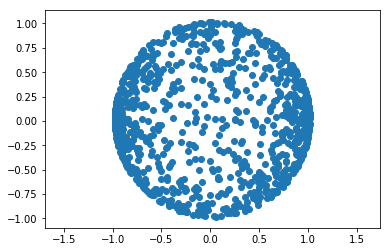

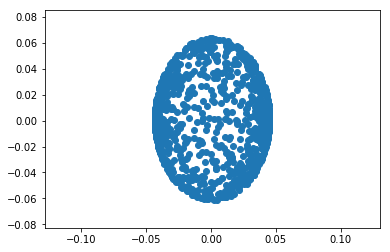

In [187]:
graph2(sk_mds(d3e,2))
graph2(my_mds(d3e,2)[0])
graph2(my_mds(d3e,2)[1])
#рисование многообразия евкл.сферы в 2d

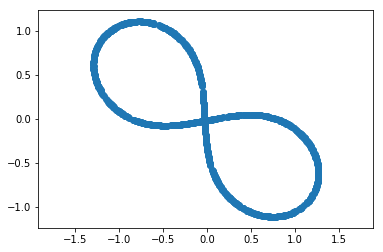

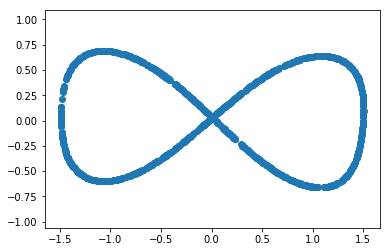

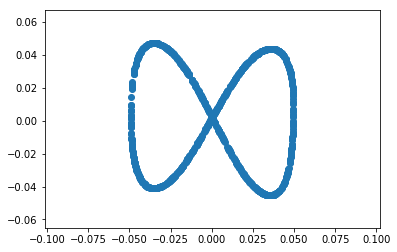

In [188]:
graph2(sk_mds(d3c,2))
graph2(my_mds(d3c,2)[0])
graph2(my_mds(d3c,2)[1])
#рисование многообразия сферы со своей метрикой в 2d